In [1]:
import networkx as nx
import pickle
import json
import numpy as np
import simpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Load the graph

In [2]:
fin_new = open("C:/Users/SID-DRW/OneDrive - Delft University of Technology/Desktop/new_boundaries_0204/GENERATING_GML/second_round/etreeGML.json")
j_new = json.loads(fin_new.read())

In [3]:
with open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Documents/GitHub/HDSS_test/data/other data/nx_graph.pkl', 'rb') as f:
    G = pickle.load(f)

In [4]:
# get name and area attributes

def get_name_area_attributes(j_file):

    result = {}

    # Extract CellSpace information
    cellspaces = j_file['PrimalSpaceFeatures']['CellSpace']
    for i, (cell_id, cell_info) in enumerate(cellspaces.items()):
        result[i] = {
            'name': cell_info.get('name', 'NA'),
            'area': cell_info['attributes'].get('area', 'NA')
        }

    return result

name_area_attr = get_name_area_attributes(j_new)
print(name_area_attr)

{0: {'name': 'CENTRALWAITING1AC1', 'area': '127.0993141'}, 1: {'name': 'WAITING/ACTIVITYAREA1DC1', 'area': '178.2169708'}, 2: {'name': 'ROOF2R02', 'area': '578.7414997'}, 3: {'name': 'CORRIDOR1EC1', 'area': '50.950835'}, 4: {'name': 'ROOF3R01', 'area': '1729.774807'}, 5: {'name': 'MAINMECHANICALROOM2D05', 'area': '226.04322'}, 6: {'name': 'CORRIDOR2AC3', 'area': '25.4807999'}, 7: {'name': 'CORRIDOR1BC2', 'area': '27.31731525'}, 8: {'name': 'TECH.OFFICE2D18', 'area': '82.089156'}, 9: {'name': 'CORRIDOR1CC1', 'area': '40.23448'}, 10: {'name': 'PHARM.DISP.1A16', 'area': '65.22472'}, 11: {'name': 'CORRIDOR1DC3', 'area': '29.65476604'}, 12: {'name': 'PHYSICALEXAM1C18', 'area': '55.37747'}, 13: {'name': 'LAB1B04', 'area': '51.1950656'}, 14: {'name': 'CORRIDOR1BC4', 'area': '41.72148526'}, 15: {'name': 'CORRIDOR2BC3', 'area': '24.92304611'}, 16: {'name': 'CORRIDOR2BC5', 'area': '20.941674'}, 17: {'name': 'RECEIVING/STORAGE1E24', 'area': '115.1199912'}, 18: {'name': 'CORRIDOR2AC1', 'area': '39

In [5]:
def enlarge_name_area_arrt(old_attr,G):
    default_value = {'name': 'NA', 'area': 'NA'}
    current_max_key = max(old_attr.keys())

    for i in range(1, (len(G.nodes)-len(old_attr)+1)):
        old_attr[current_max_key + i] = default_value

    return old_attr


new_arrt = enlarge_name_area_arrt(name_area_attr,G)
print(new_arrt)

{0: {'name': 'CENTRALWAITING1AC1', 'area': '127.0993141'}, 1: {'name': 'WAITING/ACTIVITYAREA1DC1', 'area': '178.2169708'}, 2: {'name': 'ROOF2R02', 'area': '578.7414997'}, 3: {'name': 'CORRIDOR1EC1', 'area': '50.950835'}, 4: {'name': 'ROOF3R01', 'area': '1729.774807'}, 5: {'name': 'MAINMECHANICALROOM2D05', 'area': '226.04322'}, 6: {'name': 'CORRIDOR2AC3', 'area': '25.4807999'}, 7: {'name': 'CORRIDOR1BC2', 'area': '27.31731525'}, 8: {'name': 'TECH.OFFICE2D18', 'area': '82.089156'}, 9: {'name': 'CORRIDOR1CC1', 'area': '40.23448'}, 10: {'name': 'PHARM.DISP.1A16', 'area': '65.22472'}, 11: {'name': 'CORRIDOR1DC3', 'area': '29.65476604'}, 12: {'name': 'PHYSICALEXAM1C18', 'area': '55.37747'}, 13: {'name': 'LAB1B04', 'area': '51.1950656'}, 14: {'name': 'CORRIDOR1BC4', 'area': '41.72148526'}, 15: {'name': 'CORRIDOR2BC3', 'area': '24.92304611'}, 16: {'name': 'CORRIDOR2BC5', 'area': '20.941674'}, 17: {'name': 'RECEIVING/STORAGE1E24', 'area': '115.1199912'}, 18: {'name': 'CORRIDOR2AC1', 'area': '39

In [6]:
nx.set_node_attributes(G,new_arrt)
print(G.nodes(data=True))
egdes = G.edges()
print(len(egdes))
print(G.edges(data=True))

[(0, {'coords': [-8.052733, 30.98757, 0.0], 'name': 'CENTRALWAITING1AC1', 'area': '127.0993141'}), (1, {'coords': [-33.151512, 31.68331, 0.0], 'name': 'WAITING/ACTIVITYAREA1DC1', 'area': '178.2169708'}), (2, {'coords': [-40.878929, 24.653619, 4.57], 'name': 'ROOF2R02', 'area': '578.7414997'}), (3, {'coords': [-36.12081, 11.009619, 0.0], 'name': 'CORRIDOR1EC1', 'area': '50.950835'}), (4, {'coords': [-20.182727, 35.317, 9.25], 'name': 'ROOF3R01', 'area': '1729.774807'}), (5, {'coords': [-38.358625, 31.718344, 4.57], 'name': 'MAINMECHANICALROOM2D05', 'area': '226.04322'}), (6, {'coords': [-13.218816, 45.343605, 4.57], 'name': 'CORRIDOR2AC3', 'area': '25.4807999'}), (7, {'coords': [-8.011654, 18.634846, 0.0], 'name': 'CORRIDOR1BC2', 'area': '27.31731525'}), (8, {'coords': [-34.381143, 16.815643, 4.57], 'name': 'TECH.OFFICE2D18', 'area': '82.089156'}), (9, {'coords': [-32.874889, 48.775556, 0.0], 'name': 'CORRIDOR1CC1', 'area': '40.23448'}), (10, {'coords': [-10.367429, 41.196086, 0.0], 'na

# Four step model

### Step 1, Trip Generation

 Each room's trip generation and trip attrction are determined by room capacity:

 $\text{Room capacity} =  \frac{\text{Room area}}{\text{Space requirement per person}}  $

 $\text{Room's trip generation} = \text{Room's trip attraction} =  \text{Room capacity}  $

In [38]:
#Calculate Room Capacity Based on Space Requirement

default_space_requirement = 10  # Default space for all rooms

old_node_areas = nx.get_node_attributes(G, 'area')

node_areas = {key: float(value) if value != 'NA' else value for key, value in old_node_areas.items()}
node_names = nx.get_node_attributes(G, 'name')

trip_generation = {}
trip_attraction = {}

for node, area in node_areas.items():
    if isinstance(area, (int, float)):
        # Determine space requirement based on node name
        
        space_requirement = default_space_requirement  # 15 m² per person for other rooms
        
        # Calculate room capacity
        capacity = area // space_requirement
        trip_generation[node] = int(capacity)
        trip_attraction[node] = int(capacity)
    else:
        # No generation/attraction for undefined areas
        trip_generation[node] = 0
        trip_attraction[node] = 0


target_row_sums = np.array(list(trip_generation.values()))
target_col_sums = np.array(list(trip_attraction.values()))
print(target_row_sums.shape)
print(target_col_sums.shape)
print(target_row_sums)
print(target_col_sums)


(502,)
(502,)
[ 12  17  57   5 172  22   2   2   8   4   6   2   5   5   4   2   2  11
   3   1   6   2   2   4   3   1   1   2   1   6   1   1   2   1   1   1
   1   3   1   7   1   2   1   0   2   3   1   1   2   1   1   1   2   0
   2   3   1   0   1   1   2   0   0   0   1   0   0   0   1   0   1   1
   1   0   0   0   0   2   1   0   0   0   0   5   1   1   1   0   0   0
   0   0   1   1   1   0   1   1   1   1   0   0   2   2   1   1   2   1
   1   1   0   0   0   1   0   0   0   0   0   1   0   0   0   1   0   2
   1   0   3   1   0   1   0   0   1   1   1   0   1   1   1   1   1   1
   1   0   1   0   0   0   1   0   0   1   0   1   0   0   1   1   0   0
   1   1   1   0   0   5   0   1   1   1   1   0   0   0   0   0   0   0
   1   0   0   0   0   1   2   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   1   0   0   7   0   0   1   1   1   1   1   0   0   0   0
   0   0   0   1   0   0   0   0   0   0   0   1   0   1   0   0   0   0
   0   0   1   0   1   0   0   0   0 

### Step 2, trip distribution

We use a simple gravity model to calculate the number of trips between two nodes as:

$
T_{ij} \propto \frac{P_i \cdot A_j}{d_{ij}^2}
$

where:
- $ T_{ij} $: Number of trips between nodes $ i $ and $ j $,
- $ P_i $: Trip production at node $ i $,
- $ A_j $: Trip attraction at node $ j $,
- $ d_{ij} $: Distance between nodes $ i $ and $ j $,



In [8]:
#Compute Distance Matrix

def calculate_distance(node1, node2):
    pos1 = np.array(G.nodes[node1]['coords'])
    pos2 = np.array(G.nodes[node2]['coords'])
    return np.linalg.norm(pos1 - pos2)


# network metric distance calculation function (for existing buidlings)
distance_matrix = {}
for n1 in G.nodes:
    distance_matrix[n1] = {}
    for n2 in G.nodes:
        if nx.has_path(G, n1, n2):
            distance_matrix[n1][n2] = nx.shortest_path_length(G, source=n1, target=n2)  
             
        else:
            distance_matrix[n1][n2] = float('inf')

# (hypothetical buildingds only with bubble diagram)

In [69]:
# Trip Distribution Using Gravity Model
T = {}
for i in G.nodes:
    T[i] = {}
    for j in G.nodes:
        if i != j and distance_matrix[i][j] > 0:
            T[i][j] = (trip_generation[i] * trip_attraction[j] / distance_matrix[i][j] ** 2) #!!!这里不能用round，不然好多trip都是0，不能是0，因为这个数字代表这两个点之间的trip的可能性，可能性再小也不能是0
        else:
            T[i][j] = 0

T
TM = np.array([list(row.values()) for row in T.values()])

print(TM)
print(TM.shape)

T

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(502, 502)


{0: {0: 0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 6.0,
  8: 0.0,
  9: 0.0,
  10: 0.0,
  11: 0.0,
  12: 0.0,
  13: 3.75,
  14: 0.0,
  15: 0.0,
  16: 0.0,
  17: 0.0,
  18: 0.0,
  19: 0.0,
  20: 0.0,
  21: 0.0,
  22: 0.0,
  23: 0.0,
  24: 0.0,
  25: 0.0,
  26: 3.0,
  27: 0.0,
  28: 0.0,
  29: 0.0,
  30: 0.0,
  31: 0.0,
  32: 0.0,
  33: 0.0,
  34: 0.0,
  35: 0.0,
  36: 0.0,
  37: 0.0,
  38: 0.0,
  39: 0.0,
  40: 0.0,
  41: 0.0,
  42: 0.0,
  43: 0.0,
  44: 1.5,
  45: 0.0,
  46: 0.0,
  47: 0.0,
  48: 0.0,
  49: 0.0,
  50: 0.0,
  51: 0.0,
  52: 0.0,
  53: 0.0,
  54: 0.0,
  55: 0.0,
  56: 0.0,
  57: 0.0,
  58: 0.0,
  59: 0.0,
  60: 0.0,
  61: 0.0,
  62: 0.0,
  63: 0.0,
  64: 0.0,
  65: 0.0,
  66: 0.0,
  67: 0.0,
  68: 0.0,
  69: 0.0,
  70: 0.0,
  71: 0.0,
  72: 0.0,
  73: 0.0,
  74: 0.0,
  75: 0.0,
  76: 0.0,
  77: 1.5,
  78: 0.0,
  79: 0.0,
  80: 0.0,
  81: 0.0,
  82: 0.0,
  83: 0.0,
  84: 0.0,
  85: 0.0,
  86: 0.0,
  87: 0.0,
  88: 0.0,
  89: 0.0,
  90: 0.0,
  91: 0

In [68]:
def algebraic_iterative_proportional_fitting_singular(A, target_row_sums, target_col_sums, epsilon, max_iterations, delta=1e-9):
    """
    Perform the Algebraic Iterative Proportional Fitting (AIPF) algorithm for singular matrices.

    Parameters:
        A (np.ndarray): Initial matrix of size (n, o).
        target_row_sums (np.ndarray): Target row sums (vector of size n).
        target_col_sums (np.ndarray): Target column sums (vector of size o).
        epsilon (float): Error tolerance for stopping the iteration.
        max_iterations (int): Maximum number of iterations.
        delta (float): Small constant to handle zero or near-zero diagonal entries.

    Returns:
        np.ndarray: Adjusted matrix that satisfies the target row and column sums.
    """
    # Compute initial row and column sums of A
    row_sums = np.sum(A, axis=1)
    col_sums = np.sum(A, axis=0)

    # Initialize error and iteration counter
    error = np.inf
    iteration = 0

    while error > epsilon and iteration < max_iterations:
        # Scale rows of A to match target row sums
        row_scaling_factors = np.where(row_sums > 0, target_row_sums / row_sums, delta)
        A = np.multiply(A.T, row_scaling_factors).T  # Element-wise scaling of rows

        # Scale columns of A to match target column sums
        col_sums = np.sum(A, axis=0)
        col_scaling_factors = np.where(col_sums > 0, target_col_sums / col_sums, delta)
        A = np.multiply(A, col_scaling_factors)  # Element-wise scaling of columns

        # Update row and column sums
        row_sums = np.sum(A, axis=1)
        col_sums = np.sum(A, axis=0)

        # Compute total squared error
        row_error = np.sum((row_sums - target_row_sums) ** 2)
        col_error = np.sum((col_sums - target_col_sums) ** 2)
        error = row_error + col_error

        # Increment iteration counter
        iteration += 1

    return A

# Parameters
epsilon = 1e-6
max_iterations = 10000

# Perform AIPF
adjusted_TM = algebraic_iterative_proportional_fitting_singular(TM, target_row_sums, target_col_sums, epsilon, max_iterations)

print("Adjusted Trip Matrix:")
print(adjusted_TM)


C:\Users\SID-DRW\AppData\Local\Temp\ipykernel_19872\3811079621.py:26: RuntimeWarning: divide by zero encountered in divide
  row_scaling_factors = np.where(row_sums > 0, target_row_sums / row_sums, delta)
C:\Users\SID-DRW\AppData\Local\Temp\ipykernel_19872\3811079621.py:26: RuntimeWarning: invalid value encountered in divide
  row_scaling_factors = np.where(row_sums > 0, target_row_sums / row_sums, delta)
C:\Users\SID-DRW\AppData\Local\Temp\ipykernel_19872\3811079621.py:31: RuntimeWarning: divide by zero encountered in divide
  col_scaling_factors = np.where(col_sums > 0, target_col_sums / col_sums, delta)
C:\Users\SID-DRW\AppData\Local\Temp\ipykernel_19872\3811079621.py:31: RuntimeWarning: invalid value encountered in divide
  col_scaling_factors = np.where(col_sums > 0, target_col_sums / col_sums, delta)


Adjusted Trip Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Step 3, mode choice

In this research, we assume all patients' travel mode in the hospital is walking.
In the future, we can also add other travel modes such as wheel chairs or electric golf cart/shuttles.

### Step 4, trip assignment

This step assigns the distributed trips to specific paths with shortest distance in the graph.

In [45]:
# Trip Assignment (Shortest Path Allocation with Path Collection)
flows = {tuple(sorted(edge)): 0 for edge in G.edges}
paths = {}  # To store paths for each trip
total_trips = 0  # Initialize total trips counter

for origin in G.nodes:
    for destination in G.nodes:
        if origin != destination and T[origin][destination] > 0:
            total_trips += T[origin][destination]  # Add trips to the total
            path = nx.shortest_path(G, source=origin, target=destination)
            paths[(origin, destination)] = path  # Store the path
            for i in range(len(path) - 1):
                edge = tuple(sorted((path[i], path[i + 1])))
                flows[edge] += T[origin][destination]

T

# 这个T（trip distribution matrix不太对，不能有这么多0）

True


In [11]:
# Print paths for each trip
print("Paths for Each Trip:")
for (origin, destination), path in paths.items():
    origin_name = node_names[origin]
    destination_name = node_names[destination]
    path_names = [node_names[node] for node in path]
    print(f"From {origin_name} to {destination_name}: {path_names}")


# Print trip generation and attraction for reference
print(paths)
print("\nTrip Generation:", trip_generation)
print("Trip Attraction:", trip_attraction)
#print(f"\nTotal Trips: {round(total_trips, 1)}")
print("\nnumber of paths generated:", len(paths))

Paths for Each Trip:
From CENTRALWAITING1AC1 to CORRIDOR1BC2: ['CENTRALWAITING1AC1', 'NA', 'CORRIDOR1BC2']
From CENTRALWAITING1AC1 to LAB1B04: ['CENTRALWAITING1AC1', 'NA', 'CORRIDOR1BC2', 'NA', 'LAB1B04']
From CENTRALWAITING1AC1 to CORRIDOR1AC5: ['CENTRALWAITING1AC1', 'NA', 'CORRIDOR1AC5']
From CENTRALWAITING1AC1 to RECEPTION1B13: ['CENTRALWAITING1AC1', 'NA', 'CORRIDOR1BC2', 'NA', 'RECEPTION1B13']
From CENTRALWAITING1AC1 to RADIOGRAPHICROOM1B19: ['CENTRALWAITING1AC1', 'NA', 'CORRIDOR1BC2', 'NA', 'RADIOGRAPHICROOM1B19']
From CENTRALWAITING1AC1 to TECH.WORKROOM1B17: ['CENTRALWAITING1AC1', 'NA', 'CORRIDOR1BC2', 'NA', 'TECH.WORKROOM1B17']
From WAITING/ACTIVITYAREA1DC1 to PHYSICALEXAM1C18: ['WAITING/ACTIVITYAREA1DC1', 'NA', 'CORRIDOR1DC4', 'NA', 'PROVIDERCUBICLES1D16', 'NA', 'PHYSICALEXAM1C18']
From WAITING/ACTIVITYAREA1DC1 to PROVIDERCUBICLES1D16: ['WAITING/ACTIVITYAREA1DC1', 'NA', 'CORRIDOR1DC4', 'NA', 'PROVIDERCUBICLES1D16']
From WAITING/ACTIVITYAREA1DC1 to CORRIDOR1DC7: ['WAITING/ACTIVI

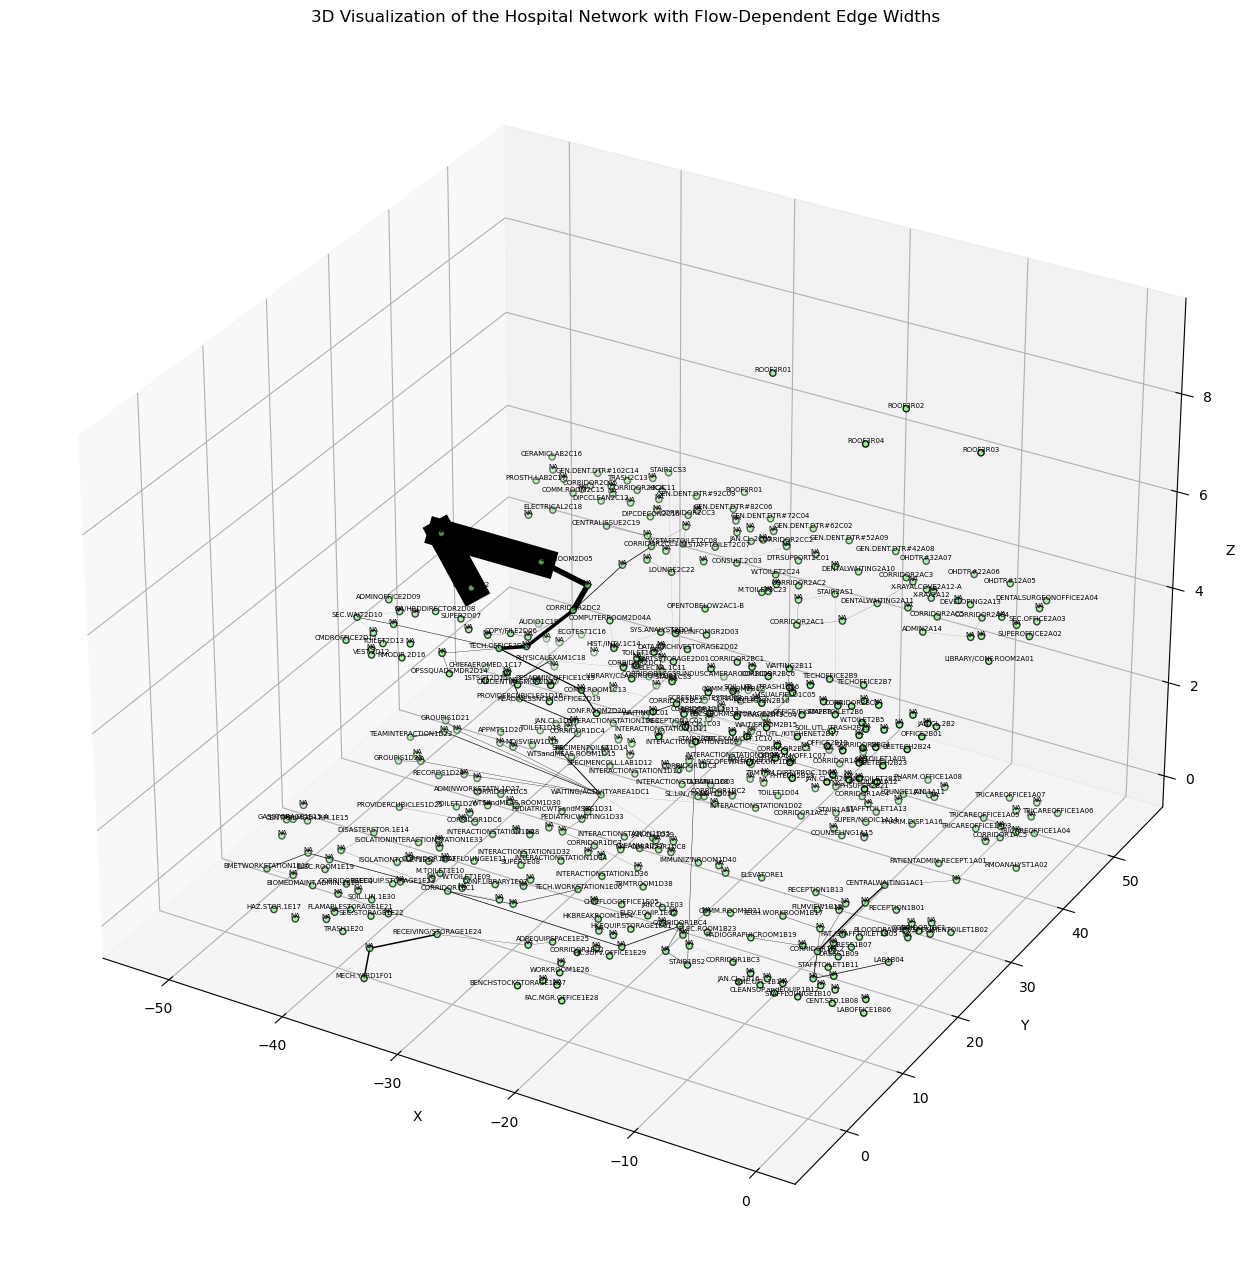

In [12]:
 

# visualization (better in GH)

pos = nx.get_node_attributes(G, 'coords')
node_labels = nx.get_node_attributes(G, 'name')

# Extract node coordinates for plotting
xs = [pos[node][0] for node in G.nodes()]
ys = [pos[node][1] for node in G.nodes()]
zs = [pos[node][2] for node in G.nodes()]

# Calculate max flow for normalization
max_flow = max(flows.values()) if flows else 1

fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(111, projection='3d')

# Plot nodes as scatter points
ax.scatter(xs, ys, zs, s=20, c='lightgreen', edgecolors='black', depthshade=True)

# Optionally add node labels
for node, (x, y, z) in pos.items():
    label = node_labels.get(node, str(node))
    ax.text(x, y, z, label, fontsize=5, verticalalignment='bottom', horizontalalignment='center')

# Plot edges with varying linewidth based on flow magnitude
for u, v in G.edges():
    # Ensure consistent key ordering if using tuple(sorted(...)) in flows dictionary
    edge_key = tuple(sorted((u, v)))
    flow = flows.get(edge_key, 0)
    
    # Normalize the flow to determine line width
    # Adjust the multiplier (e.g., 5) to get desired thickness range
    linewidth = (flow / max_flow) * 20 if max_flow > 0 else 0
    
    # Extract coordinates for this edge
    x_coords = [pos[u][0], pos[v][0]]
    y_coords = [pos[u][1], pos[v][1]]
    z_coords = [pos[u][2], pos[v][2]]
    
    # Draw the edge with the calculated linewidth
    ax.plot(x_coords, y_coords, z_coords, color='black', linewidth=linewidth)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Visualization of the Hospital Network with Flow-Dependent Edge Widths")
plt.show()


# ！用4-step model算average people density 和 average walking distance, 用des算average waiting time，看看能不能用4-step model 算average extra walking distance， 不能就用des算

# DES

### For the 202 paths generated in the 4 Step Model, we created 202 patient agents and each patient goes through a path from the total 202 paths.

In [13]:
env = simpy.Environment()

In [14]:
# Create SimPy resources for rooms
room_resources = {}
for node, capacity in trip_attraction.items():
    if capacity > 0:
        room_resources[node] = simpy.Resource(env, capacity=int(capacity))


In [15]:
def patient(env, patient_id, origin, destination, path, room_resources, G):
    arrival_time = env.now
    total_waiting_time = 0
    total_walking_distance = 0
    current_node = origin

    for i in range(len(path) - 1):
        next_node = path[i + 1]
        # Calculate walking distance and time
        walking_distance = calculate_distance(current_node, next_node)
        walking_speed = 40  # Units per time unit (adjust as needed)
        walking_time = walking_distance / walking_speed
        yield env.timeout(walking_time)
        total_walking_distance += walking_distance

        # If the next node is a room with capacity constraints
        if next_node in room_resources:
            with room_resources[next_node].request() as request:
                arrival_to_room = env.now
                yield request  # Wait until room is available
                waiting_time = env.now - arrival_to_room
                total_waiting_time += waiting_time
                # Simulate service time in room
                service_time = 5  # Time spent in the room (adjust as needed)
                
                yield env.timeout(np.random.exponential(service_time))
        current_node = next_node

    # Collect patient data
    patient_data.append({
        'patient_id': patient_id,
        'arrival_time': arrival_time,
        'departure_time': env.now,
        'total_walking_distance': total_walking_distance,
        'total_waiting_time': total_waiting_time,
        'origin': origin,
        'destination': destination
    })


In [16]:
patient_data = []

def patient_generator(env, trip_generation, T, paths, room_resources, G):
    patient_id = 0
    for origin in G.nodes:
        num_patients = trip_generation[origin]
        for _ in range(num_patients):
            for destination in G.nodes:
                if origin != destination and T[origin][destination] > 0:
                    num_trips = int(T[origin][destination])
                    for _ in range(num_trips):
                        path = paths.get((origin, destination))
                        if path:
                            env.process(patient(env, patient_id, origin, destination, path, room_resources, G))
                            patient_id += 1
                            inter_arrival_time = 5  # Time between patient arrivals (adjust as needed) #这里
                            yield env.timeout(np.random.exponential(inter_arrival_time))


In [17]:
# Initialize data structures
room_occupancy = {node: [] for node in room_resources}

def occupancy_monitor(env, room_resources):
    while True:
        for node, resource in room_resources.items():
            occupancy = len(resource.users)
            room_occupancy[node].append((env.now, occupancy))
        yield env.timeout(1)  # Record every time unit

# Start occupancy monitoring
env.process(occupancy_monitor(env, room_resources))

<Process(occupancy_monitor) object at 0x15e1c786e90>

In [18]:
# Start patient generation
env.process(patient_generator(env, trip_generation, T, paths, room_resources, G))

# Run the simulation
simulation_time = 1000  # Total simulation time (adjust as needed)
env.run(until=simulation_time)

# Evaluation mechanism of simulation results

### Aggregating simulation results

$\text{Average Patient Waiting Time} =  \frac{\text{Total Patient Waiting Time}}{\text{Number of Patients}}  $

$\text{Average Patient Walking Distance} =  \frac{\text{Total Patient Walking Distance}}{\text{Number of Patients}}  $

In [19]:
# Compute average walking distance
if patient_data:
    average_walking_distance = sum(p['total_walking_distance'] for p in patient_data) / len(patient_data)
else:
    average_walking_distance = 0

# Compute average waiting time
if patient_data:
    average_waiting_time = sum(p['total_waiting_time'] for p in patient_data) / len(patient_data)
else:
    average_waiting_time = 0

# Compute average total time
if patient_data:
    average_total_time = sum((p['departure_time'] - p['arrival_time']) for p in patient_data) / len(patient_data)
else:
    average_total_time = 0

print(f"Average Walking Distance: {average_walking_distance}")
print(f"Average Waiting Time: {average_waiting_time}")

print(patient_data)

Average Walking Distance: 17.28405212633934
Average Waiting Time: 0.9046012065663313
[{'patient_id': 0, 'arrival_time': 0, 'departure_time': 2.629335582458899, 'total_walking_distance': 12.354644366790904, 'total_waiting_time': 0.0, 'origin': 0, 'destination': 7}, {'patient_id': 1, 'arrival_time': 2.810151855093244, 'departure_time': 4.9156020398468065, 'total_walking_distance': 12.354644366790904, 'total_waiting_time': 0.0, 'origin': 0, 'destination': 7}, {'patient_id': 3, 'arrival_time': 8.865489163814257, 'departure_time': 12.910996287688615, 'total_walking_distance': 12.354644366790904, 'total_waiting_time': 0.0, 'origin': 0, 'destination': 7}, {'patient_id': 2, 'arrival_time': 6.342334715663187, 'departure_time': 17.577935630111728, 'total_walking_distance': 12.354644366790904, 'total_waiting_time': 0.0, 'origin': 0, 'destination': 7}, {'patient_id': 4, 'arrival_time': 20.579297952923646, 'departure_time': 26.425165827578653, 'total_walking_distance': 12.354644366790904, 'total_wa

$\text{Average Patient Extra Walking distance} =  \frac{\text{Total Patient Extra Walking Distance}}{\text{Number of Patients}}  $

where:

$
\text{Total Patient Extra Walking Distance} = \sum_{i=1}^{N} (d_i - d_{\text{s}})
$

where:
- $N$: Total number of patients.
- $d_i$: Random path's distance for patient $i$.
- $d_{\text{s}}$: Shortest path's distance for patient $i$.

In [20]:
# random walk simulation
def get_random_path(start_node, end_node, G):
    
    # Random walk
    current_node = start_node
    path = [current_node]

    while current_node != end_node:
        neighbors = list(G.neighbors(current_node))
        if not neighbors:  # If no neighbors, break the loop
            break
        next_node = random.choice(neighbors)
        path.append(next_node)
        current_node = next_node

    if current_node == end_node:
        random_path = path
    return random_path

def calculate_path_distance(path, graph):
    
    total_distance = 0

    for i in range(len(path) - 1):
        # Get positions of the current node and the next node in the path
        pos1 = np.array(graph.nodes[path[i]]['coords'])
        pos2 = np.array(graph.nodes[path[i + 1]]['coords'])
        
        # Calculate the Euclidean distance using numpy
        distance = np.linalg.norm(pos1 - pos2)
        total_distance += distance

    return total_distance


total_random_distance = 0
for data in patient_data:
    origin = data['origin']
    destination = data['destination']
    random_path = get_random_path(origin,destination,G)
    random_path_distance = calculate_path_distance(random_path,G)
    total_random_distance += random_path_distance

average_random_distance = total_random_distance / len(patient_data)
average_extra_walking_distance = average_random_distance - average_walking_distance
print(f"Average Extra Walking Distance: {average_extra_walking_distance}")

Average Extra Walking Distance: 504.077718052803


$\text{Average People Density in Public areas} =  \frac{\sum_{i=1}^n {\text{Average People Density in Room}_i}}{\text{n}}  $

where:
- $\text{Average People Density in Room}_i = \frac{{\text{Total number of patients entered Room}_i}}{\text{simulation time}}$,
- $\text {n = number of public rooms} $

In [21]:
# Calculate average density
average_density = {}
for node, occupancy_data in room_occupancy.items():
    if occupancy_data:
        total_occupancy = sum(occupancy for time, occupancy in occupancy_data)
        average_occupancy = total_occupancy / len(occupancy_data)
        average_density[node] = average_occupancy
    else:
        average_density[node] = 0


average_density_dict = {}
for node, density in average_density.items():
    room_name = node_names[node]
    average_density_dict[room_name]=density

# people density at public nodes (waiting areas, corridors)
nodes = G.nodes(data=True)
keywords = ['WAITING', 'CORRIDOR']

filtered_node_ids = [
    node_id for node_id, attributes in G.nodes(data=True)
    if any(keyword in attributes.get('name', '') for keyword in keywords)
       and average_density.get(node_id, 0) != 0
]

filtered_crowding = {
    node_id: average_density[node_id] 
    for node_id in filtered_node_ids 
    if node_id in average_density
}

# average people density at public areas (waiting areas, corridors and stairs)
average_crowding = sum(filtered_crowding.values()) / len(filtered_crowding)
print("Average people density at public areas:", average_crowding)

Average people density at public areas: 0.427


### Reletavizing simulation results

### 1. Relativizing average patient walking distance

$\text{Relative Walking Distance} = \left( \frac{\text{Average Patient Walking Distance}}{\text{Graph Total Distance}} \right) \times 100$

where The Graph Total Distance is the total distance across all edges in the hospital graph

In [22]:
# Calculate the distance between each pair of connected nodes in the graph
def calculate_total_path_distance(graph):
    total_distance = 0
    for u, v in graph.edges:
        pos_u = np.array(graph.nodes[u]['coords'])
        pos_v = np.array(graph.nodes[v]['coords'])
        # Calculate Euclidean distance between nodes u and v
        distance = np.linalg.norm(pos_u - pos_v)
        total_distance += distance
    return total_distance

# Total path distance for the entire hospital layout
total_path_distance = calculate_total_path_distance(G)

# Calculate relative walking distance as a percentage of total path distance
relative_walking_distance = (average_walking_distance / total_path_distance) * 100

print(f"Total Path Distance (hospital size): {total_path_distance:.2f}")
print(f"Average Patient Walking Distance: {average_walking_distance}")
print(f"Relative Walking Distance (% of hospital size): {relative_walking_distance:.2f}%")


Total Path Distance (hospital size): 1544.47
Average Patient Walking Distance: 17.28405212633934
Relative Walking Distance (% of hospital size): 1.12%


### 2. Relativizing average patient extra walking distance

$\text{Relative Patient Extra Walking Distance} = \left( \frac{\text{Average Patient Extra Walking Distance}}{\text{Graph Total Distance}} \right) \times 100$

where The Graph Total Distance is the total distance across all edges in the hospital graph

In [23]:
relative_extra_walking_distance = (average_extra_walking_distance / total_path_distance) * 100

print(f"Total Path Distance (hospital size): {total_path_distance:.2f}")
print(f"Average Patient Extra Walking Distance: {average_extra_walking_distance}")
print(f"Relative Patient Extra Walking Distance (% of hospital size): {relative_extra_walking_distance:.2f}%")


Total Path Distance (hospital size): 1544.47
Average Patient Extra Walking Distance: 504.077718052803
Relative Patient Extra Walking Distance (% of hospital size): 32.64%


### 3. Relativizing average patient waiting times

$\text{Relative Waiting Time} = \left( \frac{\text{Average Patient Waiting Time}}{\text{Average Total Time in Hospital}} \right) \times 100$


In [24]:
relative_waiting_time = (average_waiting_time / average_total_time) * 100

print(f"Average Patient Waiting Time: {average_waiting_time:.2f} minutes")
print(f"Average Total Patient Time in Hospital: {average_total_time:.2f} minutes")
print(f"Relative Waiting Time (% of total time in hospital): {relative_waiting_time:.2f}%")

Average Patient Waiting Time: 0.90 minutes
Average Total Patient Time in Hospital: 8.54 minutes
Relative Waiting Time (% of total time in hospital): 10.60%


### 4. Relativizing average crowdingness

$\text{Relative People Density} = \left( \frac{\text{Target Density}}{\text{Average People Density}} \right) \times 100$

Where:

- **Relative Density** is the average people density as a percentage of the total capacity.
- **Average People Density** is the actual density (people per unit area) observed.
- **Target Density** is the desired or target density (people per unit area) based on the total available space.


In [25]:
# Sample data: Assuming public areas in the graph have a specific area attribute
public_nodes = filtered_node_ids
total_public_area = sum(float(G.nodes[node]['area']) for node in public_nodes)

# Define target density (recommended people per square meter, 1 people per sq. meter)
target_density_per_sqm = 1

# Calculate total capacity based on target density
total_capacity = total_public_area * target_density_per_sqm

# Calculate relative density as a percentage of total capacity
relative_density = (average_crowding * total_public_area / total_capacity) * 100

print(f"Total Public Area: {total_public_area:.2f} square meters")
print(f"Average People Density: {average_crowding:.5f} people per square meter")
print(f"Total Capacity (at target density): {total_capacity:.2f} people")
print(f"Relative Density (% of total capacity): {relative_density:.2f}%")


Total Public Area: 46.54 square meters
Average People Density: 0.42700 people per square meter
Total Capacity (at target density): 46.54 people
Relative Density (% of total capacity): 42.70%


## Interpretating simulation results

### 1. Functional unit for patient walking distance

### "Percentage of hospital size per visit"

In [26]:
print(f"Percentage of hospital size per visit, {relative_walking_distance:.2f}%")

Percentage of hospital size per visit, 1.12%


### 2. Functional unit for extra patient walking distance

### "Percentage of hospital size per visit"

In [27]:
print(f"Percentage of hospital size per visit, {relative_extra_walking_distance:.2f}%")

Percentage of hospital size per visit, 32.64%


### 3. Functional unit for patient waiting time

### "Percentage of total time spent per visit"

In [28]:
print(f"Percentage of total time spent per visit, {relative_waiting_time:.2f}%")

Percentage of total time spent per visit, 10.60%


### 4. Functional unit for people density

### "Occupancy Percentage per Square Meter":

Similar to how "calories per gram" shows energy concentration, this functional unit expresses how much of the hospital’s capacity is being used per unit area.
Example: "10.25% occupancy per square meter" would mean that, on average, each square meter of public area holds 10.25% of its maximum capacity.

In [29]:
print(f"Occupancy Percentage per Square Meter, {relative_density:.2f}%")

Occupancy Percentage per Square Meter, 42.70%
